# Feature Selection

In [15]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned data from Phase 1
df = pd.read_csv('../data/heart_disease.csv')
print("Data loaded!")
print(f"Original shape: {df.shape}")
df.head()

Data loaded!
Original shape: (303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [16]:
# Based on my correlation analysis,these are the top features
features_to_keep = ['thal', 'ca', 'exang', 'oldpeak', 'cp', 'slope', 'sex', 'target']

# Create a new DataFrame with only these features
df_selected = df[features_to_keep]
print("Selected features based on correlation analysis")
print(f"New shape: {df_selected.shape}")
print("\nFeatures kept:")
for feature in features_to_keep:
    print(f" - {feature}")

Selected features based on correlation analysis
New shape: (303, 8)

Features kept:
 - thal
 - ca
 - exang
 - oldpeak
 - cp
 - slope
 - sex
 - target


In [17]:
# Check the new dataset
print("First 5 rows of selected features:")
df_selected.head()

First 5 rows of selected features:


,thal,ca,exang,oldpeak,cp,slope,sex,target
0,6.0,0.0,0,2.3,1,3,1,0
1,3.0,3.0,1,1.5,4,2,1,1
2,7.0,2.0,1,2.6,4,2,1,1
3,3.0,0.0,0,3.5,3,3,1,0
4,3.0,0.0,0,1.4,2,1,0,0


Correlation with target (selected features only):
target     1.000000
thal       0.522057
ca         0.460033
exang      0.431894
oldpeak    0.424510
cp         0.414446
slope      0.339213
sex        0.276816
Name: target, dtype: float64


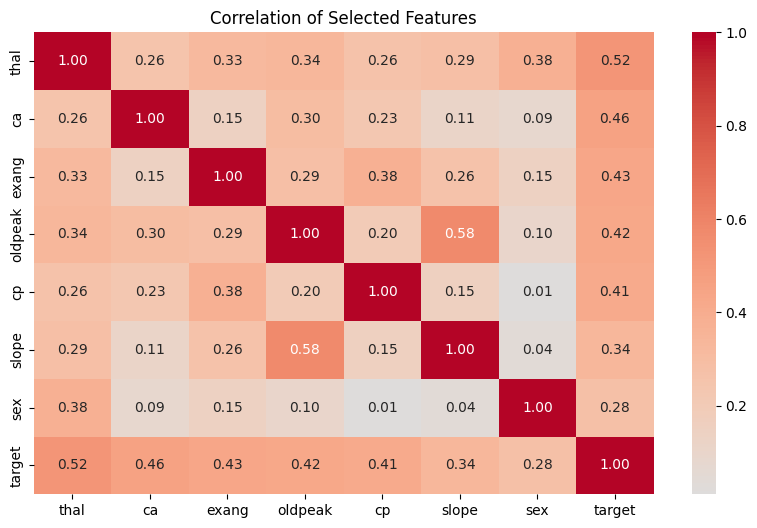

In [18]:
# Verify these are indeed the strongest correlates
selected_corr = df_selected.corr()['target'].sort_values(ascending=False)
print("Correlation with target (selected features only):")
print(selected_corr)

# Plot a focused heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_selected.corr(), annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation of Selected Features')
plt.show()

In [19]:
# Save the dataset with selected features
df_selected.to_csv('../data/heart_disease_selected.csv', index=False)
print("Focused dataset saved to '../data/heart_disease_selected.csv'")
print(f"Final dataset shape: {df_selected.shape}")
print(f"Features: {list(df_selected.columns)}")

Focused dataset saved to '../data/heart_disease_selected.csv'
Final dataset shape: (303, 8)
Features: ['thal', 'ca', 'exang', 'oldpeak', 'cp', 'slope', 'sex', 'target']


In [20]:
# Load the final cleaned data
df = pd.read_csv('../data/heart_disease.csv')

# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA for 95% variance
from sklearn.decomposition import PCA
pca = PCA()
X_pca_all = pca.fit_transform(X_scaled)

# Determine number of components for 95% variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components for 95% variance: {n_components_95}")

# Apply PCA with optimal components
pca_final = PCA(n_components=n_components_95)
X_reduced = pca_final.fit_transform(X_scaled)

# Save to CSV
df_pca = pd.DataFrame(X_reduced, columns=[f'PC{i+1}' for i in range(n_components_95)])
df_pca['target'] = y
df_pca.to_csv('../data/heart_disease_pca.csv', index=False)
print("PCA-reduced data saved as 'heart_disease_pca.csv'")

Number of components for 95% variance: 12
PCA-reduced data saved as 'heart_disease_pca.csv'


Number of features selected by correlation: 7
Number of PCA components to explain 95% variance: 12

PCA Components Summary:


,PCA Component,Explained Variance Ratio,Cumulative Variance
0,PC1,0.236873,0.236873
1,PC2,0.123071,0.359944
2,PC3,0.095314,0.455258
3,PC4,0.084340,0.539598
4,PC5,0.075830,0.615428
5,PC6,0.067930,0.683359
6,PC7,0.066517,0.749876
7,PC8,0.059837,0.809713
8,PC9,0.052885,0.862597
9,PC10,0.043348,0.905946



Comparison between Feature Selection and PCA:


,Method,Number of Features/Components,Description
0,Correlation-based Feature Selection,7,Selected 7 features based on correlation with ...
1,PCA,12,PCA reduced dimensionality to 12 components ex...


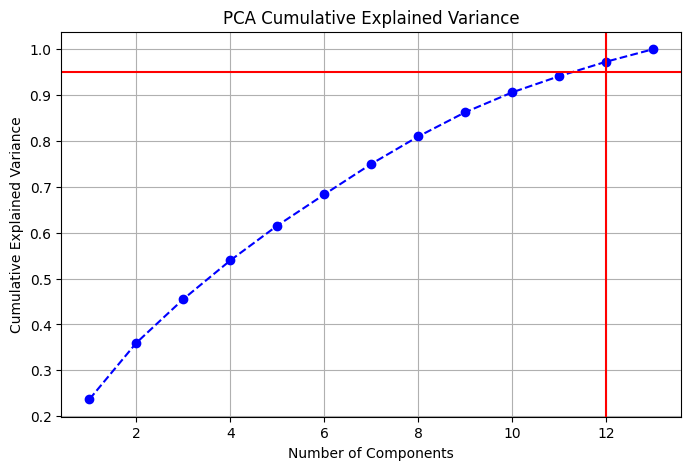

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the cleaned dataset 
df = pd.read_csv('../data/heart_disease.csv')

# Features used for correlation-based selection
features_to_keep = ['thal', 'ca', 'exang', 'oldpeak', 'cp', 'slope', 'sex']
print(f"Number of features selected by correlation: {len(features_to_keep)}")

# PCA applied on the full cleaned dataset (excluding target)
X = df.drop(columns=['target'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit PCA
pca = PCA().fit(X_scaled)

# Explained variance ratio per component
explained_variance = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_variance = np.cumsum(explained_variance)

# Number of components to explain 95% variance
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of PCA components to explain 95% variance: {n_components_95}")

# Create a DataFrame summarizing PCA components and variance explained
pca_summary = pd.DataFrame({
    'PCA Component': [f'PC{i+1}' for i in range(len(explained_variance))],
    'Explained Variance Ratio': explained_variance,
    'Cumulative Variance': cumulative_variance
})

# Show the summary of PCA components up to n_components_95
print("\nPCA Components Summary:")
display(pca_summary.head(n_components_95))

# Summary table comparing the two approaches
comparison = pd.DataFrame({
    'Method': ['Correlation-based Feature Selection', 'PCA'],
    'Number of Features/Components': [len(features_to_keep), n_components_95],
    'Description': [
        f'Selected {len(features_to_keep)} features based on correlation with target',
        f'PCA reduced dimensionality to {n_components_95} components explaining 95% variance'
    ]
})

print("\nComparison between Feature Selection and PCA:")
display(comparison)

# Optional: Plot cumulative variance explained by PCA components
plt.figure(figsize=(8,5))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.axvline(x=n_components_95, color='r', linestyle='-')
plt.title('PCA Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# Compare RandomForest with Selected Features vs PCA Features


Selected features shape: (303, 8)
PCA features shape: (303, 13)

Performance Comparison:
           Selected Features (7)  PCA Features (12 PCs)
Accuracy                0.786885               0.852459
Precision               0.714286               0.806452
Recall                  0.892857               0.892857
F1-score                0.793651               0.847458
ROC AUC                 0.892316               0.943723


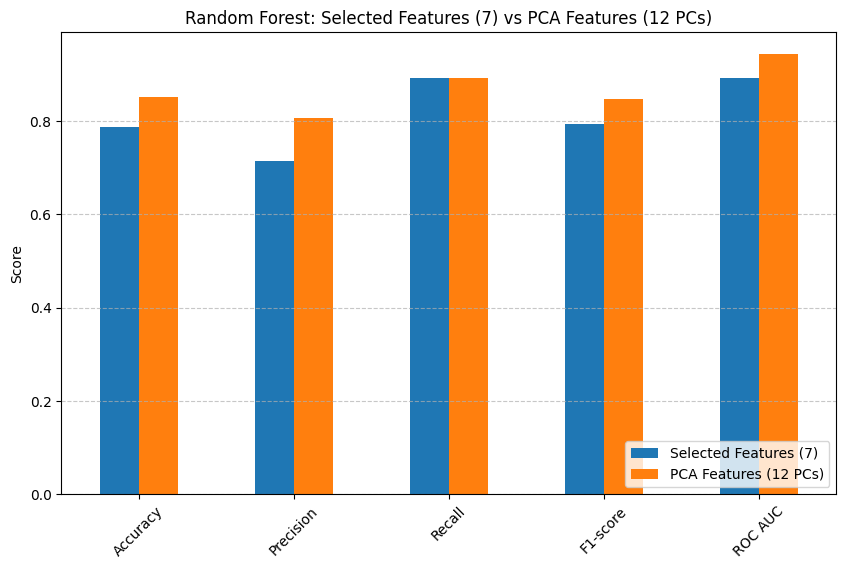

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt

# 1. Load datasets

df_selected = pd.read_csv('../data/heart_disease_selected.csv')
df_pca = pd.read_csv('../data/heart_disease_pca.csv')

print("Selected features shape:", df_selected.shape)
print("PCA features shape:", df_pca.shape)

# 2. Split features & target

X_sel = df_selected.drop('target', axis=1)
y_sel = df_selected['target']

X_pca = df_pca.drop('target', axis=1)
y_pca = df_pca['target']

X_sel_train, X_sel_test, y_sel_train, y_sel_test = train_test_split(
    X_sel, y_sel, test_size=0.2, random_state=42, stratify=y_sel
)

X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(
    X_pca, y_pca, test_size=0.2, random_state=42, stratify=y_pca
)

# 3. Train RandomForest models

model_sel = RandomForestClassifier(random_state=42)
model_pca = RandomForestClassifier(random_state=42)

model_sel.fit(X_sel_train, y_sel_train)
model_pca.fit(X_pca_train, y_pca_train)

# 4. Predictions & Evaluation

y_sel_pred = model_sel.predict(X_sel_test)
y_pca_pred = model_pca.predict(X_pca_test)

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC AUC']

results = {
    'Selected Features (7)': [
        accuracy_score(y_sel_test, y_sel_pred),
        precision_score(y_sel_test, y_sel_pred),
        recall_score(y_sel_test, y_sel_pred),
        f1_score(y_sel_test, y_sel_pred),
        roc_auc_score(y_sel_test, model_sel.predict_proba(X_sel_test)[:, 1])
    ],
    'PCA Features (12 PCs)': [
        accuracy_score(y_pca_test, y_pca_pred),
        precision_score(y_pca_test, y_pca_pred),
        recall_score(y_pca_test, y_pca_pred),
        f1_score(y_pca_test, y_pca_pred),
        roc_auc_score(y_pca_test, model_pca.predict_proba(X_pca_test)[:, 1])
    ]
}

results_df = pd.DataFrame(results, index=metrics)
print("\nPerformance Comparison:")
print(results_df)


# 5. Visualization

results_df.plot(kind='bar', figsize=(10,6))
plt.title("Random Forest: Selected Features (7) vs PCA Features (12 PCs)")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()